<a href="https://colab.research.google.com/github/alwaysalearner1234/ML02/blob/main/Dummy_variables_and_one_hot_encoding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Categorical Variables and One Hot Encoding**

In [8]:
import pandas as pd


In [9]:
df = pd.read_csv("homeprices (1).csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


**Using pandas to create dummy variables**

In [10]:
df['town'] = ['monroe township', 'monroe township', 'monroe township', 'west windsor', 'west windsor']
dummies = pd.get_dummies(df.town)
dummies

,monroe township,west windsor
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True


In [11]:
merged = pd.concat([df,dummies],axis='columns')
merged

,area,price,town,monroe township,west windsor
0,2600,550000,monroe township,True,False
1,3000,565000,monroe township,True,False
2,3200,610000,monroe township,True,False
3,3600,680000,west windsor,False,True
4,4000,725000,west windsor,False,True


In [12]:
final = merged.drop(['town'], axis='columns')
final


,area,price,monroe township,west windsor
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,False,True
4,4000,725000,False,True


Dummy Variable Trap






When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.








**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you**

In [13]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township
0,2600,550000,True
1,3000,565000,True
2,3200,610000,True
3,3600,680000,False
4,4000,725000,False


In [14]:
X = final.drop('price', axis='columns')
X

,area,monroe township
0,2600,True
1,3000,True
2,3200,True
3,3600,False
4,4000,False


In [15]:
y = final.price


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(X,y)


LinearRegression()

In [18]:
model.predict(X) # 2600 sqr ft home in new jersey

array([542500., 581500., 601000., 683000., 722000.])

In [19]:
model.score(X,y)


0.9809746328437917

In [20]:
model.predict([[3400,0]]) # 3400 sqr ft home in west windsor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([663500.])

In [21]:
model.predict([[2800,0]]) # 2800 sqr ft home in robbinsville


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([605000.])

****

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,area,price,town
0,2600,550000,0
1,3000,565000,0
2,3200,610000,0
3,3600,680000,1
4,4000,725000,1


In [24]:
X = dfle[['town','area']].values


In [25]:
X


array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   1, 3600],
       [   1, 4000]])

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({
    'town': [
        'west windsor', 'robinsville', 'monroe township',
        'plainsboro', 'hightstown',
        'west windsor', 'robinsville', 'monroe township',
        'plainsboro', 'hightstown'
    ],
    'area': [3400, 2800, 3600, 3000, 2500, 4000, 3200, 3700, 3100, 2600],
    'price': [620000, 480000, 540000, 500000, 420000,
              700000, 510000, 590000, 520000, 430000]
})


In [27]:
# Label encode
le = LabelEncoder()
df['town_encoded'] = le.fit_transform(df['town'])

# Train model
X_le = df[['town_encoded', 'area']]
y = df['price']

model_le = LinearRegression()
model_le.fit(X_le, y)

# Check mapping
town_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Town mapping:", town_mapping)


Town mapping: {'hightstown': np.int64(0), 'monroe township': np.int64(1), 'plainsboro': np.int64(2), 'robinsville': np.int64(3), 'west windsor': np.int64(4)}


In [28]:
preds_le = {}
for town in le.classes_:
    town_num = le.transform([town])[0]
    preds_le[town] = model_le.predict([[town_num, 3400]])[0]  # Predict for 3400 sqft

print("Label Encoding Predictions:")
for k, v in preds_le.items():
    print(f"{k}: {v:.2f}")


Label Encoding Predictions:
hightstown: 525075.41
monroe township: 542441.26
plainsboro: 559807.11
robinsville: 577172.95
west windsor: 594538.80


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# One-hot encode towns
dummies = pd.get_dummies(df['town'])
df_oh = pd.concat([df, dummies], axis=1).drop(['town','town_encoded'], axis=1)

X_oh = df_oh.drop('price', axis=1)
y = df_oh['price']

model_oh = LinearRegression()
model_oh.fit(X_oh, y)

# Predict for 3400 sqft in all towns
preds_oh = {}
for i, town in enumerate(dummies.columns):
    sample = [3400] + [1 if j==i else 0 for j in range(len(dummies.columns))]
    preds_oh[town] = model_oh.predict([sample])[0]

print("\nOne-Hot Encoding Predictions:")
for k, v in preds_oh.items():
    print(f"{k}: {v:.2f}")



One-Hot Encoding Predictions:
hightstown: 530090.91
monroe township: 534090.91
plainsboro: 553272.73
robinsville: 544454.55
west windsor: 622909.09


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
import matplotlib.pyplot as plt

# Predictions from previous step
towns = list(preds_le.keys())
label_preds = [preds_le[t] for t in towns]
onehot_preds = [preds_oh[t] for t in towns]

# Bar width and positions
import numpy as np
x = np.arange(len(towns))
width = 0.35


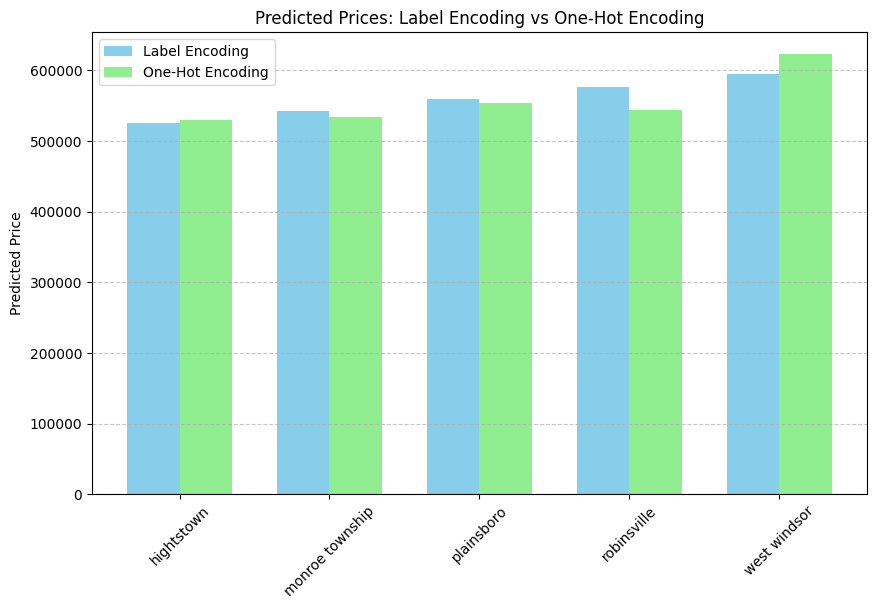

In [31]:
plt.figure(figsize=(10,6))

# Label Encoding bars
plt.bar(x - width/2, label_preds, width, label='Label Encoding', color='skyblue')

# One-Hot Encoding bars
plt.bar(x + width/2, onehot_preds, width, label='One-Hot Encoding', color='lightgreen')

# Labels & title
plt.xticks(x, towns, rotation=45)
plt.ylabel('Predicted Price')
plt.title('Predicted Prices: Label Encoding vs One-Hot Encoding')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [32]:
import pandas as pd

dummies = pd.get_dummies(dfle.town)
final = pd.concat([dfle, dummies], axis='columns')


In [33]:
X = final.drop('price', axis='columns')
X

,area,town,0,1
0,2600,0,True,False
1,3000,0,True,False
2,3200,0,True,False
3,3600,1,False,True
4,4000,1,False,True


In [34]:
y = final.price


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
X = final[['area','monroe township','robbinsville']]
y = final['price']

model.fit(X, y)


KeyError: "['robbinsville'] not in index"

In [38]:
print(final.columns)


Index(['area', 'price', 'town', 0, 1], dtype='object')


In [39]:
import pandas as pd

# Suppose your original df looks like:
#   town              area   price
# 0 west windsor      2600   550000
# 1 robbinsville      3000   565000
# 2 monroe township   3200   610000

# One-hot encode the 'town' column
dummies = pd.get_dummies(df['town'])

# Merge with original dataframe
final = pd.concat([df, dummies], axis='columns')

# Drop the original 'town' column
final = final.drop(['town'], axis='columns')

# Drop one dummy column to avoid dummy variable trap
final = final.drop(['west windsor'], axis='columns')

print(final.head())


   area   price  town_encoded  hightstown  monroe township  plainsboro  \
0  3400  620000             4       False            False       False   
1  2800  480000             3       False            False       False   
2  3600  540000             1       False             True       False   
3  3000  500000             2       False            False        True   
4  2500  420000             0        True            False       False   

   robinsville  
0        False  
1         True  
2        False  
3        False  
4        False  


In [41]:
X = final[['area','monroe township','robinsville']]
y = final['price']

model.fit(X, y)


LinearRegression()

In [42]:
X = final[['area','monroe township',]].to_numpy()
y = final['price'].to_numpy()

model.fit(X, y)


LinearRegression()

In [44]:
model.predict(X) # 2600 sqr ft home in new jersey


array([585293.20987654, 469367.28395062, 555339.50617284, 508009.25925926,
       411404.32098765, 701219.13580247, 546651.2345679 , 574660.49382716,
       527330.24691358, 430725.30864198])

In [43]:
model.score(X,y)


0.9501378221326239

In [45]:
model.predict([[3400,0]]) # 3400 sqr ft home in west windsor


array([585293.20987654])

In [46]:
model.predict([[2800,0]]) # 2800 sqr ft home in robbinsville


array([469367.28395062])

**Using sklearn OneHotEncoder**




First step is to use label encoder to convert town names into numbers

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price,town_encoded
0,4,3400,620000,4
1,3,2800,480000,3
2,1,3600,540000,1
3,2,3000,500000,2
4,0,2500,420000,0
5,4,4000,700000,4
6,3,3200,510000,3
7,1,3700,590000,1
8,2,3100,520000,2
9,0,2600,430000,0


In [49]:
X = dfle[['town','area']].values


In [50]:
X


array([[   4, 3400],
       [   3, 2800],
       [   1, 3600],
       [   2, 3000],
       [   0, 2500],
       [   4, 4000],
       [   3, 3200],
       [   1, 3700],
       [   2, 3100],
       [   0, 2600]])

In [51]:
y = dfle.price.values
y


array([620000, 480000, 540000, 500000, 420000, 700000, 510000, 590000,
       520000, 430000])

Now use one hot encoder to create dummy variables for each of the town

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [53]:
X = ct.fit_transform(X)
X

array([[0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.4e+03],
       [0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.5e+03],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 3.7e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.6e+03]])

In [54]:
X = X[:,1:]

In [55]:

X

array([[0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.4e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 2.8e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.5e+03],
       [0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 3.7e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 2.6e+03]])

In [56]:
model.fit(X,y)


LinearRegression()

In [59]:
model.predict([[0., 0., 0., 1., 3400.]]) # 3400 sqr ft home in west windsor

array([622909.09090909])

In [63]:
model.predict([[0., 0., 1., 0., 2800.]]) # 2800 sqr ft home in robbinsville

array([470272.72727273])

In [62]:
# Example: predict price for a 2800 sq ft home in robbinsville
X_test = ct.transform([['', 2800]])
print(model.predict(X_test))


ValueError: Found unknown categories [''] in column 0 during transform

In [64]:
def predict_price(town, area):
    """
    Predicts the price of a house based on town and area using the trained model.

    Args:
        town (str): The name of the town.
        area (int): The area of the house in square feet.

    Returns:
        float: The predicted price of the house.
    """
    # Transform the town using the fitted ColumnTransformer
    x_test = ct.transform([[town, area]])

    # Drop the first column to avoid dummy variable trap (as done during training)
    x_test = x_test[:, 1:]

    # Predict the price
    predicted_price = model.predict(x_test)

    return predicted_price[0]

# Example usage:
# print(f"Predicted price for 3400 sq ft in west windsor: {predict_price('west windsor', 3400):.2f}")
# print(f"Predicted price for 2800 sq ft in robbinsville: {predict_price('robbinsville', 2800):.2f}")
# print(f"Predicted price for 3600 sq ft in monroe township: {predict_price('monroe township', 3600):.2f}")

In [69]:
# Enter the town and area for your prediction here:
town_to_predict = 'monroe township' # Replace with the desired town
area_to_predict = 3000 # Replace with the desired area

predicted_price = predict_price(town_to_predict, area_to_predict)
print(f"Predicted price for {area_to_predict} sq ft in {town_to_predict}: {predicted_price:.2f}")

ValueError: Found unknown categories ['monroe township'] in column 0 during transform

In [70]:
model.predict([[0, 1, 0, 0, 2800]])


array([479090.90909091])

In [68]:
model.fit(X,y)


LinearRegression()

In [72]:
# Predict price for a 3400 sq ft home in west windsor
print(model.predict([[0., 0., 0., 1., 3400.]]))
# Predict price for a 2800 sq ft home in robbinsville
print(model.predict([[0., 0., 1., 0., 2800.]]))

[622909.09090909]
[470272.72727273]


**Exercise**

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("carprices.csv")
print(df.head())


  Car Model  Mileage  Sell Price($)  Age(yrs)
0    BMW X5    69000          18000         6
1    BMW X5    35000          34000         3
2    BMW X5    57000          26100         5
3    BMW X5    22500          40000         2
4    BMW X5    46000          31500         4


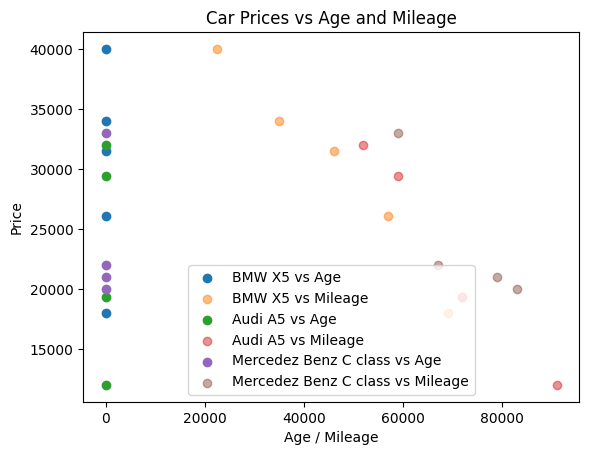

Model R^2 Score: -6.26
Predicted price for Mercedez Benz: $39515.19
Predicted price for BMW X5: $9852.56


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("carprices.csv")

# Rename columns for convenience
df.rename(columns={'Sell Price($)': 'Price', 'Age(yrs)': 'Age', 'Car Model': 'Model'}, inplace=True)

# Scatter plot: Price vs Age and Mileage
models = df['Model'].unique()
for model in models:
    subset = df[df['Model'] == model]
    plt.scatter(subset['Age'], subset['Price'], label=f"{model} vs Age")
    plt.scatter(subset['Mileage'], subset['Price'], label=f"{model} vs Mileage", alpha=0.5)

plt.xlabel("Age / Mileage")
plt.ylabel("Price")
plt.title("Car Prices vs Age and Mileage")
plt.legend()
plt.show()

# One-hot encode 'Model'
df_encoded = pd.get_dummies(df, columns=['Model'], drop_first=True)

# Features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model accuracy
score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score:.2f}")

# Predictions
# Mercedez Benz: 4 yrs, 45000 mileage
mercedez_input = pd.DataFrame({
    'Age': [4],
    'Mileage': [45000],
})
# Add dummy columns matching the training data's columns, setting the appropriate one to 1
for col in X_train.columns:
    if 'Model_' in col:
        if col == 'Model_Mercedez Benz C class':
            mercedez_input[col] = 1
        else:
            mercedez_input[col] = 0
# Ensure the column order matches the training data
mercedez_input = mercedez_input[X_train.columns]


# BMW X5: 7 yrs, 86000 mileage
bmw_input = pd.DataFrame({
    'Age': [7],
    'Mileage': [86000],
})
# Add dummy columns matching the training data's columns, setting the appropriate one to 1
for col in X_train.columns:
    if 'Model_' in col:
        if col == 'Model_BMW X5':
            bmw_input[col] = 1
        else:
            bmw_input[col] = 0
# Ensure the column order matches the training data
bmw_input = bmw_input[X_train.columns]

price_mercedez = model.predict(mercedez_input)[0]
price_bmw = model.predict(bmw_input)[0]

print(f"Predicted price for Mercedez Benz: ${price_mercedez:.2f}")
print(f"Predicted price for BMW X5: ${price_bmw:.2f}")

In [83]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df


,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [84]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [85]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [86]:
final = merged.drop(["Car Model","Mercedez Benz C class"],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [87]:
X = final.drop('Sell Price($)',axis='columns')
X


,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [88]:
y = final['Sell Price($)']
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [90]:
model.fit(X,y)


LinearRegression()

In [91]:
model.score(X,y)


0.9417050937281082

**Price of mercedez benz that is 4 yr old with mileage 45000**

In [92]:
model.predict([[45000,4,0,0]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

**Price of BMW X5 that is 7 yr old with mileage 86000**

In [93]:
model.predict([[86000,7,0,1]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [94]:
import pandas as pd

df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green'], 'Price': [100, 150, 200]})
dummies = pd.get_dummies(df['Color'])

merged = pd.concat([df, dummies], axis='columns')
print(merged)


   Color  Price   Blue  Green    Red
0    Red    100  False  False   True
1   Blue    150   True  False  False
2  Green    200  False   True  False


In [103]:
import pandas as pd

# Get the model's expected columns
cols = model.feature_names_in_

# Create a DataFrame of zeros for all columns
new_car = pd.DataFrame([[0]*len(cols)], columns=cols)

# Fill in the numeric features
new_car['Age(yrs)'] = 4           # 4 years old
new_car['Mileage'] = 45000        # 45,000 miles

# Find the exact dummy column for Mercedes and set it to 1
# It must match exactly as in trained_cols which are ['Mileage' 'Age(yrs)' 'Audi A5' 'BMW X5']
for col in cols:
    if 'Mercedez' in col:
        new_car[col] = 1
        break

# Predict price
predicted_price = model.predict(new_car)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $36,991.32


In [97]:
import pandas as pd

# Get the model's expected columns
cols = model.feature_names_in_

# Create a DataFrame of zeros for all columns
new_car = pd.DataFrame([[0]*len(cols)], columns=cols)

# Fill in the features for your car
new_car['Age(yrs)'] = 4           # 4 years old
new_car['Mileage'] = 45000        # 45,000 miles
new_car['Car Model_Mercedes'] = 1 # Set the Mercedes dummy to 1


In [104]:
predicted_price = model.predict(new_car)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $36,991.32


In [99]:
# This shows the exact feature names the model expects
print(model.feature_names_in_)


['Mileage' 'Age(yrs)' 'Audi A5' 'BMW X5']


In [100]:
import pandas as pd

# Get trained feature names
trained_cols = model.feature_names_in_

# Create a DataFrame of zeros for all columns
new_car = pd.DataFrame([[0]*len(trained_cols)], columns=trained_cols)

# Fill in the numeric features
new_car['Age(yrs)'] = 4        # your car's age
new_car['Mileage'] = 45000     # mileage

# Find the exact dummy column for Mercedes and set it to 1
# It must match exactly as in trained_cols
for col in trained_cols:
    if 'Mercedes' in col:
        new_car[col] = 1
        break


In [101]:
predicted_price = model.predict(new_car)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $36,991.32


In [106]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [107]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [108]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [109]:
final = merged.drop(["Car Model","Mercedez Benz C class"],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


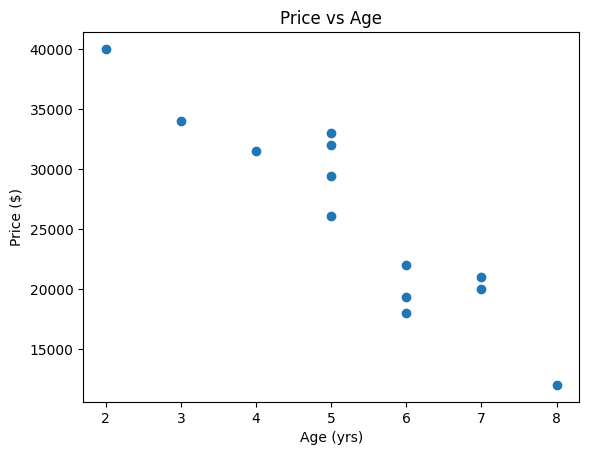

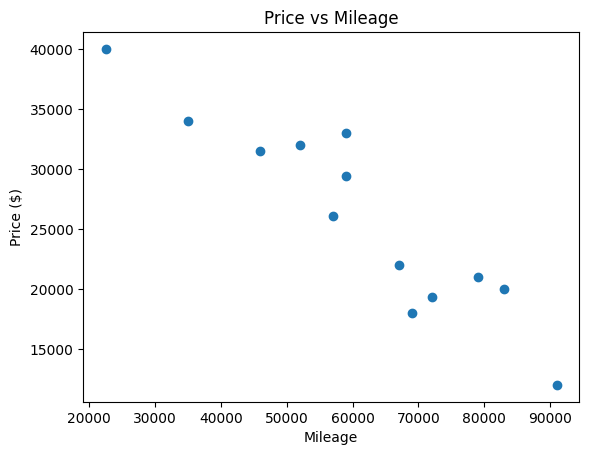

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("carprices.csv")

# Plot Price vs Age
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])
plt.xlabel('Age (yrs)')
plt.ylabel('Price ($)')
plt.title('Price vs Age')
plt.show()

# Plot Price vs Mileage
plt.scatter(df['Mileage'], df['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.title('Price vs Mileage')
plt.show()


In [116]:
print(merged.columns)


Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'BMW X5', 'Mercedez Benz C class'],
      dtype='object')


In [117]:
# Drop original text column + one dummy column
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis=1)

print(final.head())


   Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5
0    69000          18000         6    False    True
1    35000          34000         3    False    True
2    57000          26100         5    False    True
3    22500          40000         2    False    True
4    46000          31500         4    False    True


In [118]:
X = final.drop('Sell Price($)',axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [119]:
y = final['Sell Price($)']
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [121]:
model.fit(X,y)


LinearRegression()

In [122]:
model.score(X,y)


0.9417050937281082

**Price of mercedez benz that is 4 yr old with mileage 45000**



In [123]:
model.predict([[45000,4,0,0]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [124]:
model.predict([[86000,7,0,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [125]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Load dataset
df = pd.read_csv("carprices.csv")

# Step 2: Convert Car Model into dummy variables
dummies = pd.get_dummies(df['Car Model'])

# Step 3: Merge dummies with original df
merged = pd.concat([df, dummies], axis=1)

# Step 4: Drop original Car Model and ONE dummy column (Mercedes as baseline)
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis=1)

# Step 5: Define features (X) and target (y)
X = final.drop('Sell Price($)', axis=1)  # independent variables
y = final['Sell Price($)']               # dependent variable

# Step 6: Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 7: Predict price of Mercedes Benz (4 yrs old, mileage 45000)
# Mercedes => Audi A5 = 0, BMW X5 = 0
new_car = pd.DataFrame([[45000, 4, 0, 0]],
                       columns=['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5'])

predicted_price = model.predict(new_car)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $36,991.32


In [126]:
# Accuracy (R^2 score) of the model
score = model.score(X, y)
print(f"Model R² Score: {score:.2f}")


Model R² Score: 0.94


In [127]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load dataset
df = pd.read_csv("carprices.csv")

# Step 2: One-hot encode Car Model
dummies = pd.get_dummies(df['Car Model'])
merged = pd.concat([df, dummies], axis=1)

# Step 3: Drop Car Model column + one dummy column
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis=1)

# Step 4: Define features and target
X = final.drop('Sell Price($)', axis=1)
y = final['Sell Price($)']

# Step 5: Split data into Train (70%) and Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate model
train_score = model.score(X_train, y_train)  # R² on training data
test_score = model.score(X_test, y_test)    # R² on unseen test data

print(f"Training R² Score: {train_score:.2f}")
print(f"Testing R² Score: {test_score:.2f}")


Training R² Score: 0.96
Testing R² Score: -0.18


In [128]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=3)  # 3-fold CV
print("Cross-validation scores:", scores)
print("Average R²:", np.mean(scores))


Cross-validation scores: [-0.14055228  0.68433273 -0.1082307 ]
Average R²: 0.14518325112139507


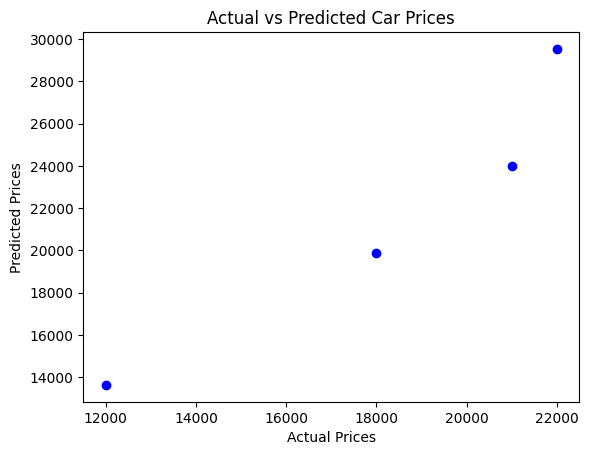

In [129]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [130]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=3)  # 3-fold CV
print("Cross-validation scores:", scores)
print("Average R²:", np.mean(scores))


Cross-validation scores: [-0.14055228  0.68433273 -0.1082307 ]
Average R²: 0.14518325112139507


In [131]:
# Mercedes Benz C class, 4 years old, 45000 mileage
new_car = pd.DataFrame([[45000, 4, 0, 0]],
                       columns=['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5'])

predicted_price = model.predict(new_car)
print(f"Predicted Price of Mercedes Benz (4 yrs, 45000 mileage): ${predicted_price[0]:,.2f}")


Predicted Price of Mercedes Benz (4 yrs, 45000 mileage): $39,105.78
